# Likelihood Analysis of the Crab with fermipy

Instructions on installing fermipy and the Fermi ScienceTools : [fermipy Installation Instructions](http://fermipy.readthedocs.org/en/latest/install.html). 

Documentation for fermipy : [fermipy](http://fermipy.readthedocs.org)

Credit : notebook adapted from [Likelihood Analysis of a bright point source with fermipy](https://nbviewer.org/github/me-manu/fermipy-extra/blob/master/notebooks/pg1553.ipynb)

## Get the Data

The data were extracted from the [LAT data server](http://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi) with the following selections :

### Make a file list

First you need to make a file containing the list of all your input event files.

In [1]:
ls -1 new_data/*PH*.fits > new_data/photon_files.txt

In [2]:
!cat new_data/photon_files.txt

new_data/L220104003237B21939CE17_PH00.fits
new_data/L220104003237B21939CE17_PH01.fits
new_data/L220104003237B21939CE17_PH02.fits
new_data/L220104003237B21939CE17_PH03.fits
new_data/L220104003237B21939CE17_PH04.fits
new_data/L220104003237B21939CE17_PH05.fits
new_data/L220104003237B21939CE17_PH06.fits
new_data/L220104003237B21939CE17_PH07.fits


Let's take a look at one of the input event files

In [3]:
with open("new_data/photon_files.txt") as f:
    input_files = f.readlines()

input_files = [f.strip("\n") for f in input_files]
print(input_files)

['new_data/L220104003237B21939CE17_PH00.fits', 'new_data/L220104003237B21939CE17_PH01.fits', 'new_data/L220104003237B21939CE17_PH02.fits', 'new_data/L220104003237B21939CE17_PH03.fits', 'new_data/L220104003237B21939CE17_PH04.fits', 'new_data/L220104003237B21939CE17_PH05.fits', 'new_data/L220104003237B21939CE17_PH06.fits', 'new_data/L220104003237B21939CE17_PH07.fits']


Read one file as a table

In [4]:
from astropy.table import Table

In [5]:
t = Table.read(input_files[0], hdu=1)

In [6]:
t

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
MeV,deg,deg,deg,deg,deg,deg,deg,deg,s,,,,,,,,s,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
147.65448,85.55153,17.611122,189.27884,-6.569244,45.194004,280.11972,25.166662,283.2566,239557651.17421445,796841,239557414,0,0 .. 0,False .. True,False .. False,1,14.211353033781052,0.0,0.0,0.0,0.0,0.0
184.90147,86.73904,19.482662,188.25197,-4.6390367,33.689953,44.95822,4.2977786,124.182335,239562937.50064796,8048259,239559565,0,0 .. 0,False .. True,False .. False,1,12.07363897562027,0.0,0.0,0.0,0.0,0.0
158.2329,84.407974,17.462225,188.83432,-7.577493,35.863506,30.043491,19.50588,108.09782,239574143.2787732,2465135,239572736,0,0 .. 0,False .. True,False .. True,0,182.7233371436596,0.0,0.0,0.0,0.0,0.0
378.4119,87.9078,19.703478,188.62558,-3.5796607,39.246056,303.7963,17.642504,100.9093,239579944.8514776,4308698,239577663,0,0 .. 0,False .. True,False .. False,1,41.22582072019577,0.0,0.0,0.0,0.0,0.0
166.23418,85.88436,18.468807,188.70561,-5.8543797,37.552147,290.32303,5.021739,131.88148,239580130.39512065,4645721,239577663,0,0 .. 0,False .. True,False .. True,0,226.76946377754211,0.0,0.0,0.0,0.0,0.0
352.65884,86.482056,18.011047,189.39395,-5.604001,55.773354,59.178432,49.026646,292.0659,239586725.22634077,5652106,239583644,0,0 .. 0,False .. True,False .. False,1,172.38039821386337,0.0,0.0,0.0,0.0,0.0
258.17212,86.16079,18.040543,189.21054,-5.8507757,33.855198,56.423244,9.018611,275.02295,239609024.43577027,4414608,239606871,0,0 .. 0,False .. True,False .. True,0,76.59270605444908,0.0,0.0,0.0,0.0,0.0
575.35077,88.11835,19.690462,188.73752,-3.4154084,56.795586,56.43025,48.06563,295.43582,239609670.0326192,5506788,239606871,0,0 .. 0,False .. True,False .. True,0,125.55742317438126,0.0,0.0,0.0,0.0,0.0


## Make a config file


Make a config file named 'config.yaml' ([yaml](http://yaml.org) format). For more details on the config file see [config.html](http://fermipy.readthedocs.org/en/latest/config.html). 

In [7]:
cat new_data/config_5.yaml

data:
  evfile : ./new_data/photon_files.txt # list of photon files
  scfile : ./new_data/L220104003237B21939CE17_SC00.fits # spacecraft file

binning:
  roiwidth   : 5.0
  binsz      : 0.01
  binsperdec : 10

selection :
  emin : 100 # minimum energy
  emax : 500000 # maximum energy
  zmax    : 90 # zenith angle cut
  evclass : 128 # event class : simple point source analysis for pass 8
  evtype  : 3 # event type (front 1 + back events 2 = 3)
  tmin : 239557417  # starting time
  tmax : 662946879  # ending time
  filter : DATA_QUAL>0 && LAT_CONFIG==1 # Recommendation for Galactic Point Source Analysis 
  ra : 83.633
  dec : 22.0145


gtlike:
  edisp : True # Enable energy dispersion
  irfs : 'P8R2_SOURCE_V6'
  edisp_disable : ['isodiff','galdiff'] # Never enable energy dispersion for the isodiff or galdiff models

model:
  src_roiwidth : 5.0 # Includes sources outside of the ROI
  galdiff  : 'gll_iem_v07.fits' # The most recent and up to date model of the galactic diffuse emission
  i

## Start the analysis

Next, you create an analysis script and run the setup steps (which include running the selections and generating exposure maps for example). This will take some time to run.

Fermipy will load the point source model, create an xml file for you which contains the models for all your sources in the region of interest (ROI).  All of this is configurable from python or from the config file. 

### Load up some useful modules

In [8]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename

Let's ignore some deprecation warnings

In [9]:
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 

### Import the GTAnalysis module from fermipy

You start by importing the module and then creating an instance of the analysis object from our config file.  When instantiating the analysis object we can override any options defined in the configuration file by passing keyword arguments to the object constructor.  
The verbosity parameter is set to 3 (INFO) which supresses DEBUG output. 

In [10]:
from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis('new_data/config_5.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5'})
matplotlib.interactive(True)

2022-02-06 23:10:01 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8


### The setup routine

This gets everything ready for the likelihood analysis.  Note that fermipy will skip generating any files that already exist in the working directory.

In [11]:
gta.setup()

2022-02-06 23:10:01 INFO    GTAnalysis.setup(): Running setup.
2022-02-06 23:10:01 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2022-02-06 23:10:01 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2022-02-06 23:10:01 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/fermipy/irfs.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, w

Let's have a look at the components of the model :

In [12]:
gta.print_model()

2022-02-06 23:10:46 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J0534.5+2200      0.003   1.618  0.000898   2.71       nan    454154.2     
4FGL J0534.5+2201s     0.005   2.308  8.88e-05   3.86       nan     63305.8     
4FGL J0534.5+2201i     0.006   0.550  0.000343   1.57       nan     32771.6     
4FGL J0526.3+2246      2.037   1.375  2.22e-06   2.08       nan       549.0     
4FGL J0544.4+2238      2.375   1.565  3.85e-06   2.57       nan      1470.6     
isodiff                  ---   1.000    0.0515   2.24       nan     20191.7     
galdiff                  ---   1.000     0.268   0.00       nan    196889.5     



In [13]:
from astropy.io import fits
fits.open('Crab_5/srcmap_00.fits').info()

Filename: Crab_5/srcmap_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (500, 500, 37)   float32   
  1  GTI           1 BinTableHDU     33   74765R x 2C   [D, D]   
  2  EBOUNDS       1 BinTableHDU     38   37R x 3C   [I, 1E, 1E]   
  3  4FGL J0526.3+2246    1 ImageHDU        11   (500, 500, 38)   float32   
  4  4FGL J0534.5+2200    1 ImageHDU        11   (500, 500, 38)   float32   
  5  4FGL J0534.5+2201i    1 ImageHDU        11   (500, 500, 38)   float32   
  6  4FGL J0534.5+2201s    1 ImageHDU        11   (500, 500, 38)   float32   
  7  4FGL J0544.4+2238    1 ImageHDU        11   (500, 500, 38)   float32   
  8  galdiff       1 ImageHDU        11   (500, 500, 38)   float32   
  9  isodiff       1 ImageHDU        11   (500, 500, 38)   float32   


Before proceeding with the analysis let's have a quick look at the files that are produced by the setup function.

In [14]:
ls Crab_5/*fits

Crab_5/4fgl_j0534.5+2201i_sed.fits  Crab_5/ft1_00.fits
Crab_5/bexpmap_00.fits              Crab_5/ltcube_00.fits
Crab_5/bexpmap_roi_00.fits          Crab_5/mcube_fit0_00.fits
Crab_5/ccube_00.fits                Crab_5/mcube_fit0.fits
Crab_5/ccube.fits                   Crab_5/srcmap_00.fits
Crab_5/fit0.fits


Here is a brief explanation of the contents of each file and its role in the analysis:

* **ft1_00.fits**: Event list.  This is generated by running gtselect and gtmktime on our input file list.
* **bexpmap_00.fits**: All-sky binned exposure map.  This map is interpolated to create an exposure model when generating the srcmap file.
* **bexpmap_roi_00.fits**: Binned exposure map for the ROI.  This file is only provided for visualization purposes in order to have an exposure map with the same binning as the data and model maps.
* **ccube_00.fits**: Counts cube for the ROI.
* **ltcube_00.fits**: Livetime cube.  This contains a map of the livetime for this observation over the whole sky as a function of incidence angle.
* **srcmap_00.fits**: Source map cube.  This file contains maps for each of the components in the ROI after convolution with exposure and the PSF.  Note that energy dispersion is applied at run-time.

Note that all of the files have a numerical suffix '00'.  This is the analysis component index.  In a multi-component analysis there would be instances of all of the above files for each analysis component.  The files with no component index are co-added maps that are provided for visualization purposes.

To see example of one of these files we can open and plot the counts cube file.  This is a 3D cube that contains the distribution of events as a function of energy and two spatial coordinates.  In the example below we sum over the energy dimension of the cube to make a 2-D sky image.

In [14]:
from astropy.io import fits
from astropy.wcs import WCS
h = fits.open('Crab_5/ccube_00.fits')
h.info()

wcs = WCS(h[0].header).dropaxis(-1)  # load the coordinate system, drop the energy axis

counts = h[0].data

Filename: Crab_5/ccube_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     137   (500, 500, 37)   int32   
  1  EBOUNDS       1 BinTableHDU     43   37R x 3C   [I, 1E, 1E]   
  2  GTI           1 BinTableHDU     50   74765R x 2C   [D, D]   


In [15]:
counts.shape

(37, 500, 500)

In [16]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---AIT'  'DEC--AIT'  
CRVAL : 83.633  22.0145  
CRPIX : 250.5  250.5  
NAXIS : 500  500

<WCSAxesSubplot:>

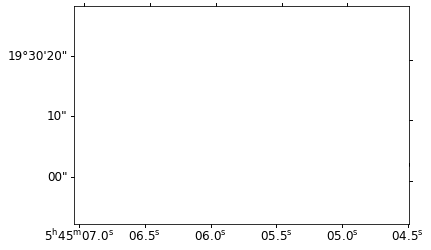

In [17]:
plt.subplot(projection=wcs)

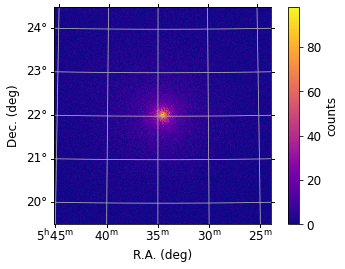

In [18]:
plt.subplot(projection=wcs)
im = plt.imshow(np.sum(counts,axis=0),interpolation='nearest',origin='lower', cmap='plasma')
plt.colorbar(im, label="counts")

plt.grid()
plt.gca().tick_params(direction='out')
plt.gca().set_xlabel("R.A. (deg)")
plt.gca().set_ylabel("Dec. (deg)")
plt.show()
#plt.savefig("Output_13year_5_config5/ccube_00.png")

In [19]:
print(wcs)

WCS Transformation

This transformation has 2 pixel and 2 world dimensions

Array shape (Numpy order): (500, 500)

Pixel Dim  Data size  Bounds
        0        500  None
        1        500  None

World Dim  Physical Type  Units
        0  pos.eq.ra      deg
        1  pos.eq.dec     deg

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes


In [20]:
len(counts)

37

Next, we look at the sky map of the exposure

Filename: Crab_5/bexpmap_roi_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   (500, 500, 38)   float32   
  1  ENERGIES      1 BinTableHDU     13   38R x 1C   [1D]   
  2  GTI           1 BinTableHDU     18   74765R x 2C   [D, D]   


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


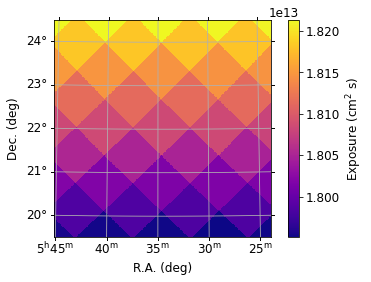

In [21]:
exp = fits.open('Crab_5/bexpmap_roi_00.fits')
exp.info()
exposure = exp[0].data

wcs = WCS(exp[0].header).dropaxis(-1)  # load the coordinate system, drop the energy axis
plt.subplot(projection=wcs)
im = plt.imshow(np.sum(exposure,axis=0),interpolation='nearest',origin='lower', cmap='plasma')
plt.colorbar(im, label="Exposure (cm$^{2}$ s)")
plt.grid()
plt.gca().tick_params(direction='out')
plt.gca().set_xlabel("R.A. (deg)")
plt.gca().set_ylabel("Dec. (deg)")
plt.savefig("Crab_5/bexpmap_roi_00.png")

... and the energy dependence of the exposure for the central pixel

In [22]:
exposure

array([[[1.3886675e+11, 1.3886675e+11, 1.3886675e+11, ...,
         1.3908605e+11, 1.3908605e+11, 1.3908605e+11],
        [1.3886675e+11, 1.3886675e+11, 1.3886675e+11, ...,
         1.3908605e+11, 1.3908605e+11, 1.3908605e+11],
        [1.3886675e+11, 1.3886675e+11, 1.3886675e+11, ...,
         1.3908605e+11, 1.3908605e+11, 1.3908605e+11],
        ...,
        [1.4456632e+11, 1.4456632e+11, 1.4456632e+11, ...,
         1.4477871e+11, 1.4477871e+11, 1.4477871e+11],
        [1.4456632e+11, 1.4456632e+11, 1.4456632e+11, ...,
         1.4477871e+11, 1.4477871e+11, 1.4477871e+11],
        [1.4456632e+11, 1.4456632e+11, 1.4456632e+11, ...,
         1.4477871e+11, 1.4477871e+11, 1.4477871e+11]],

       [[1.8012006e+11, 1.8012006e+11, 1.8012006e+11, ...,
         1.8032930e+11, 1.8032930e+11, 1.8032930e+11],
        [1.8012006e+11, 1.8012006e+11, 1.8012006e+11, ...,
         1.8032930e+11, 1.8032930e+11, 1.8032930e+11],
        [1.8012006e+11, 1.8012006e+11, 1.8012006e+11, ...,
         1.803

In [29]:
print(exposure.shape)

(38, 500, 500)


In [33]:
exposure[:, 39, 39]

array([1.3954104e+11, 1.8085845e+11, 2.2506927e+11, 2.6496514e+11,
       3.0065898e+11, 3.3435435e+11, 3.6797347e+11, 3.9852517e+11,
       4.2790119e+11, 4.5265021e+11, 4.8438411e+11, 5.1227201e+11,
       5.2981380e+11, 5.3892022e+11, 5.4279343e+11, 5.3856728e+11,
       5.3357399e+11, 5.2197641e+11, 5.2064518e+11, 5.2608021e+11,
       5.2580005e+11, 5.2404034e+11, 5.2274364e+11, 5.1834506e+11,
       5.2847772e+11, 5.3924866e+11, 5.4612040e+11, 5.4755436e+11,
       5.4609101e+11, 5.4547274e+11, 5.4360867e+11, 5.4149199e+11,
       5.4043155e+11, 5.3949481e+11, 5.3973005e+11, 5.3748030e+11,
       5.3279241e+11, 5.2617835e+11], dtype=float32)

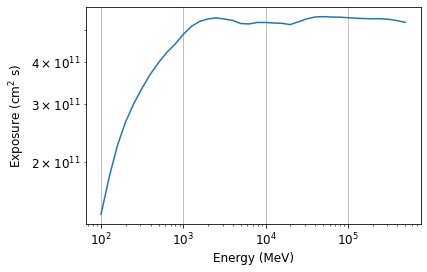

In [26]:
energy = exp[1].data
plt.loglog(energy, exposure[:, 50, 50])
plt.ylabel("Exposure (cm$^{2}$ s)")
plt.xlabel("Energy (MeV)")
plt.grid()

We can now inspect the state of the ROI before the fit

In [15]:
gta.print_roi()

2022-02-06 23:10:46 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003       nan    454154.2
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005       nan     63305.8
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006       nan     32771.6
4FGL J0526.3+2246   PointSource    PowerLaw          2.037       nan       549.0
4FGL J0544.4+2238   PointSource    PowerLaw          2.375       nan      1470.6
isodiff             ConstantValue  FileFunction      -----       nan     20191.7
galdiff             MapCubeFunctio PowerLaw          -----       nan    196889.5



Additional details about an individual source can be retrieved by printing the corresponding source object

In [23]:
print(gta.roi['4FGL J0534.5+2201i'])

Name           : 4FGL J0534.5+2201i
Associations   : ['4FGL J0534.5+2201i', 'Crab Nebula', 'J0534+2205', 'Crab']
RA/DEC         :     83.633/    22.020
GLON/GLAT      :    184.553/    -5.781
TS             : nan
Npred          : 32771.56
Flux           : 9.726e-08 +/-      nan
EnergyFlux     : 0.0003434 +/-      nan
SpatialModel   : RadialGaussian
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :    5.5e-13 +/-        nan
b'alpha'       :       1.75 +/-        nan
b'beta'        :       0.08 +/-        nan
b'Eb'          :      1e+04 +/-        nan


In [24]:
print(gta.roi['4FGL J0534.5+2201s'])

Name           : 4FGL J0534.5+2201s
Associations   : ['4FGL J0534.5+2201s', 'Crab Nebula', 'J0534+2205', 'Crab']
RA/DEC         :     83.633/    22.020
GLON/GLAT      :    184.553/    -5.781
TS             : nan
Npred          : 63305.78
Flux           : 5.799e-07 +/-      nan
EnergyFlux     : 8.883e-05 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  2.308e-07 +/-        nan
b'Index'       :     -3.865 +/-        nan
b'Scale'       :      50.55 +/-        nan


In [16]:
print(gta.roi['4FGL J0526.3+2246'])

Name           : 4FGL J0526.3+2246
Associations   : ['4FGL J0526.3+2246', '2MASS J05262938+2247232']
RA/DEC         :     81.591/    22.778
GLON/GLAT      :    182.882/    -6.957
TS             : nan
Npred          : 549.02
Flux           : 3.307e-09 +/-      nan
EnergyFlux     : 2.224e-06 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.375e-14 +/-        nan
b'Index'       :     -2.077 +/-        nan
b'Scale'       :       4399 +/-        nan


In [17]:
print(gta.roi['4FGL J0544.4+2238'])

Name           : 4FGL J0544.4+2238
Associations   : ['4FGL J0544.4+2238']
RA/DEC         :     86.109/    22.642
GLON/GLAT      :    185.236/    -3.508
TS             : nan
Npred          : 1470.62
Flux           : 1.413e-08 +/-      nan
EnergyFlux     : 3.846e-06 +/-      nan
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  1.565e-13 +/-        nan
b'Index'       :     -2.573 +/-        nan
b'Scale'       :       1679 +/-        nan


## Do the likelihood fitting

Now that all of the ancillary files have been generated, we can move on to the actual fitting.  The first thing you should do is free some of the sources since all of the sources are initially fixed.  We'll just free those sources in the center region.

In [16]:
gta.optimize()

2022-02-06 23:10:46 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['4FGL J0534.5+2200', 'galdiff', '4FGL J0534.5+2201s', '4FGL J0534.5+2201i']


/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J0534.5+2200 TS: 193835.309
Fitting shape galdiff TS: 106495.476
Fitting shape 4FGL J0534.5+2201i TS:  13853.107
Fitting shape 4FGL J0534.5+2201s TS:   9800.790
Fitting shape isodiff TS:   1008.659
Fitting shape 4FGL J0526.3+2246 TS:     64.621
Fitting shape 4FGL J0544.4+2238 TS:     27.422


2022-02-06 23:11:14 INFO    GTAnalysis.optimize(): Finished
2022-02-06 23:11:14 INFO    GTAnalysis.optimize(): LogLike: -1634557.065039 Delta-LogLike: 227.926092
2022-02-06 23:11:14 INFO    GTAnalysis.optimize(): Execution time: 28.45 s


{'loglike0': -1634784.9911309346,
 'loglike1': -1634557.0650386391,
 'dloglike': 227.92609229544178,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

In [17]:
gta.free_sources(free=False) # make sure everything is fixed first

# Free Normalization of all Sources within 3 deg of ROI center
gta.free_sources(distance=3.0, pars='norm')

# Free normalizations of isotropic and galactic diffuse components
gta.free_source('galdiff', pars='norm')
gta.free_source('isodiff')

2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0534.5+2200     : ['Prefactor']
2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0534.5+2201s    : ['Prefactor']
2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0534.5+2201i    : ['norm']
2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0526.3+2246     : ['Prefactor']
2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0544.4+2238     : ['Prefactor']
2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for isodiff               : ['Normalization']
2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for galdiff               : ['Prefactor']


In this simple anlaysis we are leaving the spectral shapes of sources fixed but we're going to free the spectral shape of the source we care about.  

In [18]:
gta.free_source('4FGL J0534.5+2201i')

2022-02-06 23:11:14 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']


Now, actually do the fit.  The software does its best to get the fit to converge by running the fit several times.

In [19]:
fit_results = gta.fit()

2022-02-06 23:11:14 INFO    GTAnalysis.fit(): Starting fit.
2022-02-06 23:11:39 INFO    GTAnalysis.fit(): Fit returned successfully. Quality:   2 Status: 102
2022-02-06 23:11:39 INFO    GTAnalysis.fit(): LogLike: -1634525.314 DeltaLogLike:       31.751 


The dictionary returned by the fit method returns a variety of diagnostic information about the fit including the fit quality, the relative improvement in the likelihood, and the correlations among the fit parameters. For example :

In [20]:
print('Fit Quality: ',fit_results['fit_quality'])
print(gta.roi['4FGL J0534.5+2201i'])

Fit Quality:  2
Name           : 4FGL J0534.5+2201i
Associations   : ['4FGL J0534.5+2201i', 'Crab Nebula', 'J0534+2205', 'Crab']
RA/DEC         :     83.633/    22.020
GLON/GLAT      :    184.553/    -5.781
TS             : 18389.27
Npred          : 96667.02
Flux           : 4.018e-07 +/- 1.13e-08
EnergyFlux     : 0.0004885 +/- 3.33e-05
SpatialModel   : RadialGaussian
SpectrumType   : LogParabola
Spectral Parameters
b'norm'        :   6.68e-13 +/-  3.794e-14
b'alpha'       :      1.952 +/-    0.03179
b'beta'        :    0.02536 +/-   0.002369
b'Eb'          :      1e+04 +/-        nan


In [21]:
print(gta.roi['4FGL J0534.5+2201s'])

Name           : 4FGL J0534.5+2201s
Associations   : ['4FGL J0534.5+2201s', 'Crab Nebula', 'J0534+2205', 'Crab']
RA/DEC         :     83.633/    22.020
GLON/GLAT      :    184.553/    -5.781
TS             : 8453.90
Npred          : 64873.26
Flux           : 6.072e-07 +/- 9.84e-09
EnergyFlux     : 9.065e-05 +/- 1.47e-06
SpatialModel   : PointSource
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  2.804e-07 +/-   4.57e-09
b'Index'       :      -4.01 +/-        nan
b'Scale'       :      50.55 +/-        nan


In [22]:
print(gta.roi['4FGL J0534.5+2200'])

Name           : 4FGL J0534.5+2200
Associations   : ['4FGL J0534.5+2200', 'PSR J0534+2200', 'Crab IC field', 'J0534+2205', 'Crab pulsar']
RA/DEC         :     83.637/    22.015
GLON/GLAT      :    184.559/    -5.781
TS             : 94335.80
Npred          : 370104.28
Flux           : 1.846e-06 +/- 6.37e-09
EnergyFlux     : 0.0007294 +/- 2.52e-06
SpatialModel   : PointSource
SpectrumType   : PLSuperExpCutoff2
Spectral Parameters
b'Prefactor'   :  1.374e-10 +/-  4.747e-13
b'Index1'      :     -1.868 +/-        nan
b'Scale'       :       1463 +/-        nan
b'Expfactor'   :   0.004629 +/-        nan
b'Index2'      :     0.6667 +/-        nan


Let's have a look at the sources and the best-fit parameters after the fit

In [23]:
gta.print_roi()

2022-02-06 23:11:59 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003  94335.80    370104.3
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   8453.90     64873.3
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  18389.27     96667.0
4FGL J0526.3+2246   PointSource    PowerLaw          2.037     85.04      1858.8
4FGL J0544.4+2238   PointSource    PowerLaw          2.375     37.54      1135.1
isodiff             ConstantValue  FileFunction      -----    948.74     36922.3
galdiff             MapCubeFunctio PowerLaw          -----  78966.67    191576.5



In [24]:
gta.print_params()

2022-02-06 23:12:00 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.76     0.203     1e-05     1e+03     1e-14    *
   1 Index                     2.48         0         0         5        -1     
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.37   0.00475     1e-05     1e+03     1e-10    *
   4 Index1                    1.87         0         0         5        -1     
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                0.463         0      -0.5       0.5      0.01     
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.668    0.0379     1e-05     1e+03     1e-12    

You can then save the state of the roi to an output file for reference later.

In [26]:
#gta.write_roi('fit0',make_plots=True)
gta.write_roi('fit0')

2022-01-06 12:31:55 INFO    GTBinnedAnalysis.write_xml(): Writing /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5/fit0_00.xml...
2022-01-06 12:31:55 INFO    GTAnalysis.write_fits(): Writing /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5/fit0.fits...
2022-01-06 12:32:06 INFO    GTAnalysis.write_roi(): Writing /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5/fit0.npy...


In [25]:
gta.load_roi('fit0')

2022-02-03 14:12:55 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5/fit0.npy
2022-02-03 14:12:55 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-02-03 14:13:39 INFO    GTAnalysis.load_roi(): Finished Loading ROI


We can also inspect the final model map. The next command will return the model map as a `gammapy.Map` instance (Full documentation for `gammapy`  [here](https://docs.gammapy.org)).

In [25]:
model_map = gta.write_model_map("fit0")

2022-02-06 23:12:08 INFO    GTBinnedAnalysis.write_model_map(): Generating model map for component 00.


In [26]:
print(model_map)

[WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy']
	shape : (500, 500, 37)
	ndim  : 3
	unit  : 
	dtype : float32
, WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy']
	shape : (500, 500, 37)
	ndim  : 3
	unit  : 
	dtype : float64
]


Plot the model map summed over the energy axis. The plot shows the predicted number of counts for all model components. 

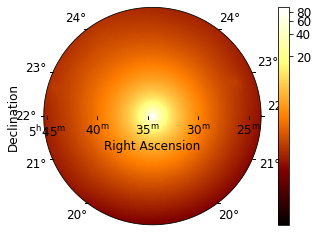

In [29]:
model_map[0].sum_over_axes(["energy"]).plot(stretch='log', add_cbar=True)
plt.savefig("Crab_5/model_map.png")

Plot each energy bin of the model map. This nicely illustrates the broad PSF at low energies. 

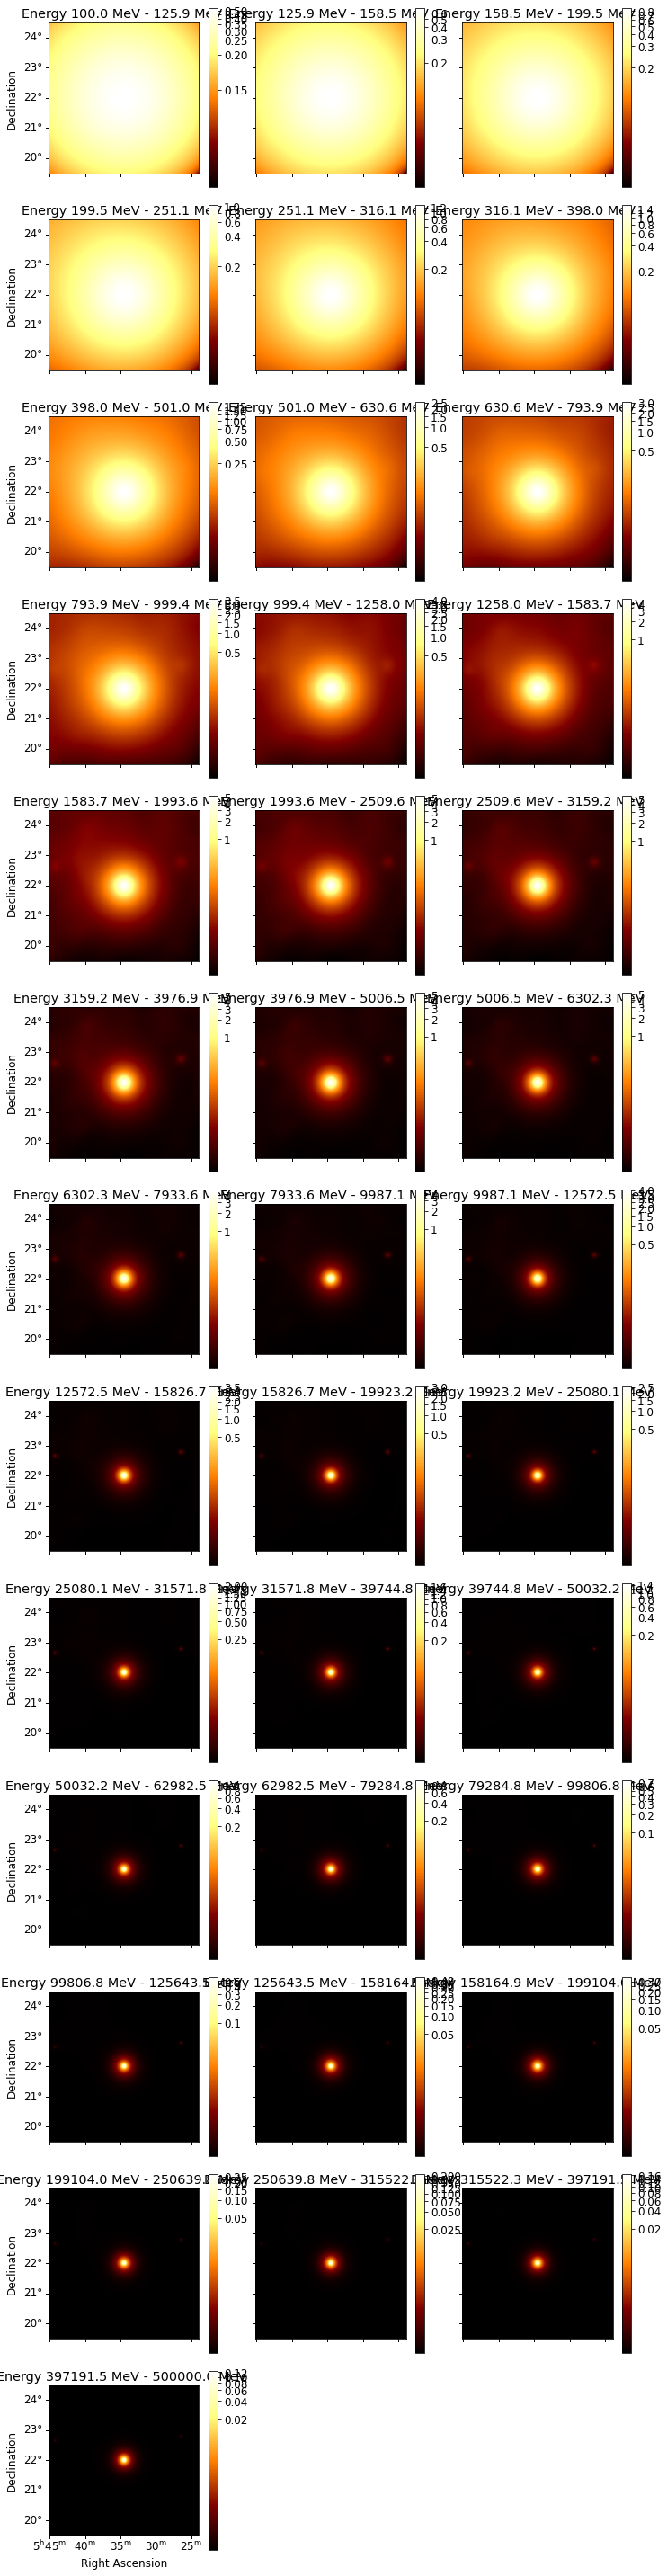

In [31]:
model_map_bins = model_map[0].plot_grid(stretch='log', add_cbar=True)
plt.savefig("Crab_5/model_map_bins.png")

### Reading in the results

The results are saved and you can retrieve them from the output numpy file. 

In [27]:
c = np.load('Crab_5/fit0.npy', allow_pickle=True).flat[0]

The `sources` dictionary has an entry for each source in the model:

In [33]:
sorted(c['sources'].keys())

['4FGL J0526.3+2246',
 '4FGL J0534.5+2200',
 '4FGL J0534.5+2201i',
 '4FGL J0534.5+2201s',
 '4FGL J0544.4+2238',
 'galdiff',
 'isodiff']

Let's take a look at the flux, spectral parameters, and TS of one of the sources.

In [34]:
c['sources']['4FGL J0534.5+2201i']['flux']

4.018243610582336e-07

In [35]:
print(c['sources']['4FGL J0534.5+2201i']['param_names'][:4])
print(c['sources']['4FGL J0534.5+2201i']['param_values'][:4])

[b'norm' b'alpha' b'beta' b'Eb']
[6.67975261e-13 1.95234549e+00 2.53626255e-02 1.00000000e+04]


In [36]:
c['sources']['4FGL J0534.5+2201i']['ts']

18389.269378773868

4FGL J0534.5+2200

In [1]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])


plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

NameError: name 'np' is not defined

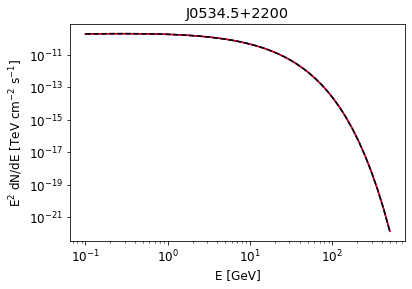

<Figure size 432x288 with 0 Axes>

In [64]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])

plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('J0534.5+2200')
plt.show()
plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [65]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2022-02-07 00:11:55 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2022-02-07 00:12:10 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-07 00:12:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-07 00:12:40 INFO    GTAnalysis.sed(): Finished SED
2022-02-07 00:12:48 INFO    GTAnalysis.sed(): Execution time: 52.65 s


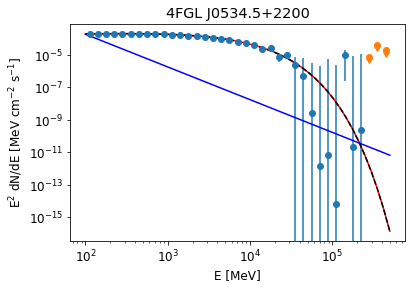

<Figure size 432x288 with 0 Axes>

In [52]:
plt.loglog(E, (E**2)*dnde_hi, 'r')
plt.loglog(E, (E**2)*dnde_lo, 'b')
plt.loglog(E, (E**2)*dnde, 'k--')
plt.errorbar(sed['e_ctr'][:-3],
             sed['e2dnde'][:-3], 
             yerr=sed['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-3:]),
         sed['e2dnde_ul95'][-3:], yerr=0.2*sed['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.title('4FGL J0534.5+2200')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum+errors.png")

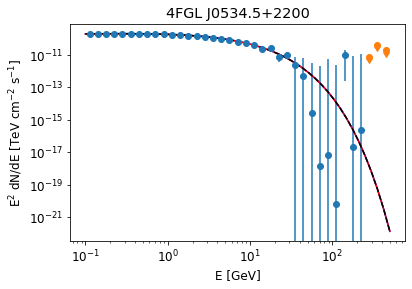

<Figure size 432x288 with 0 Axes>

In [66]:
plt.loglog(E*1e-3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E*1e-3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E*1e-3, (E**2)*dnde*1e-6, 'k--')
plt.errorbar(sed2200['e_ctr'][:-3]*1e-3,
             sed2200['e2dnde'][:-3]*1e-6, 
             yerr=sed2200['e2dnde_err'][:-3]*1e-6, fmt ='o')
plt.errorbar(np.array(sed2200['e_ctr'][-3:]*1e-3),
         sed2200['e2dnde_ul95'][-3:]*1e-6, yerr=0.2*sed2200['e2dnde_ul95'][-3:]*1e-6, 
             fmt='o', uplims=True)
plt.title('4FGL J0534.5+2200')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0534.5+2200_spectrum+errors.png")

4FGL J0534.5+2201s

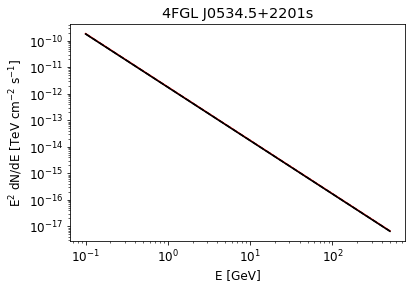

<Figure size 432x288 with 0 Axes>

In [67]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])

plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'k')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--')
plt.title('4FGL J0534.5+2201s')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0534.5+2201s_spectrum.png")

In [68]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2022-02-07 00:15:50 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2022-02-07 00:16:02 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-07 00:16:02 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-07 00:16:29 INFO    GTAnalysis.sed(): Finished SED
2022-02-07 00:16:37 INFO    GTAnalysis.sed(): Execution time: 46.88 s


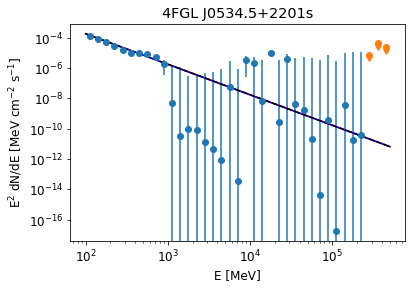

<Figure size 432x288 with 0 Axes>

In [69]:
plt.loglog(E, (E**2)*dnde_hi, 'r')
plt.loglog(E, (E**2)*dnde_lo, 'b')
plt.loglog(E, (E**2)*dnde, 'k--')
plt.errorbar(sed2201s['e_ctr'][:-3],
             sed2201s['e2dnde'][:-3], 
             yerr=sed2201s['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-3:]),
         sed2201s['e2dnde_ul95'][-3:], yerr=0.2*sed2201s['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.show()
#plt.savefig("Crab_5/J0534.5+2201s_spectrum+errors.png")

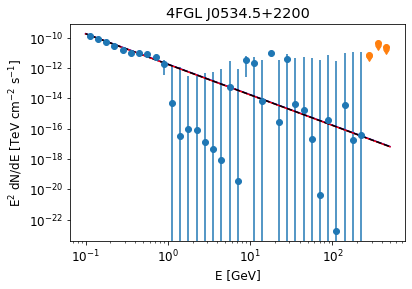

<Figure size 432x288 with 0 Axes>

In [71]:
plt.loglog(E*1e-3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E*1e-3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E*1e-3, (E**2)*dnde*1e-6, 'k--')
plt.errorbar(sed2201s['e_ctr'][:-3]*1e-3,
             sed2201s['e2dnde'][:-3]*1e-6, 
             yerr=sed2201s['e2dnde_err'][:-3]*1e-6, fmt ='o')
plt.errorbar(np.array(sed2201s['e_ctr'][-3:]*1e-3),
         sed2201s['e2dnde_ul95'][-3:]*1e-6, yerr=0.2*sed2201s['e2dnde_ul95'][-3:]*1e-6, 
             fmt='o', uplims=True)
plt.title('4FGL J0534.5+2200')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0534.5+2201s_spectrum+errors.png")

You can also plot the spectral energy distribution (SED) for this source :

4FGL J0534.5+2201i

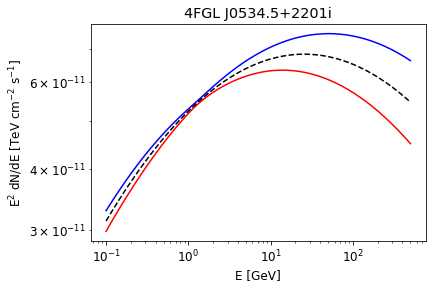

<Figure size 432x288 with 0 Axes>

In [89]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])

plt.title('4FGL J0534.5+2201i')
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0534.5+2201i_spectrum.png")

To plot the SED points, there's a function for that :

In [74]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2022-02-07 00:22:49 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2022-02-07 00:23:22 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-07 00:23:22 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-07 00:23:50 INFO    GTAnalysis.sed(): Finished SED
2022-02-07 00:23:58 INFO    GTAnalysis.sed(): Execution time: 69.47 s


In [63]:
src = gta.roi['4FGL J0534.5+2201i']

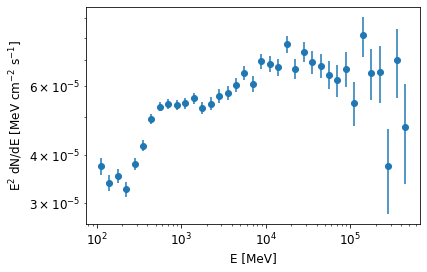

In [75]:
plt.loglog()
plt.errorbar(np.array(sed2201i['e_ctr']),
             sed2201i['e2dnde'], 
             yerr=sed2201i['e2dnde_err'], fmt ='o')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

THe error bars for highest energy points are very large, it looks like those last three points should be upper limits. Let's plot those instead.

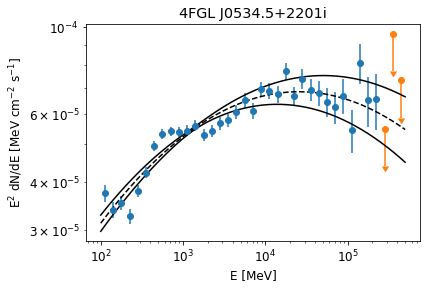

In [81]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(sed['e_ctr'][:-3],
             sed['e2dnde'][:-3], 
             yerr=sed['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-3:]),
         sed['e2dnde_ul95'][-3:], yerr=0.2*sed['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.show()

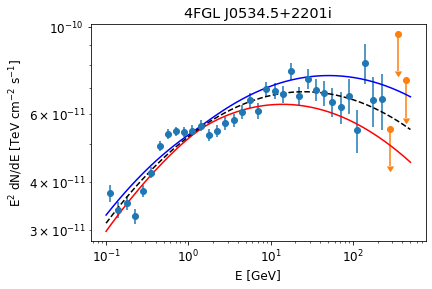

<Figure size 432x288 with 0 Axes>

In [90]:
plt.loglog(E*1e-3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E*1e-3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E*1e-3, (E**2)*dnde*1e-6, 'k--')
plt.errorbar(sed2201i['e_ctr'][:-3]*1e-3,
             sed2201i['e2dnde'][:-3]*1e-6, 
             yerr=sed2201i['e2dnde_err'][:-3]*1e-6, fmt ='o')
plt.errorbar(np.array(sed2201i['e_ctr'][-3:]*1e-3),
         sed2201i['e2dnde_ul95'][-3:]*1e-6, yerr=0.2*sed2201i['e2dnde_ul95'][-3:]*1e-6, 
             fmt='o', uplims=True)
plt.title('4FGL J0534.5+2201i')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0534.5+2201i_spectrum+errors.png")

4FGL J0526.3+2246

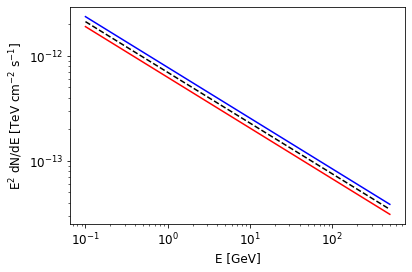

<Figure size 432x288 with 0 Axes>

In [56]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])

plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--')
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'r')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.ti
plt.show()
plt.savefig("Crab_5/J0526.3+2246_spectrum.png")

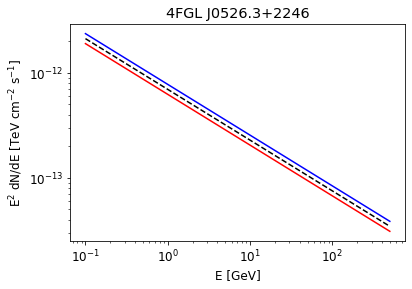

<Figure size 432x288 with 0 Axes>

In [91]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])

plt.title('4FGL J0526.3+2246')
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0526.3+2246_spectrum.png")

In [83]:
sed2246 = gta.sed('4FGL J0526.3+2246')

2022-02-07 00:30:05 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-02-07 00:30:23 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-07 00:30:23 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-07 00:30:54 INFO    GTAnalysis.sed(): Finished SED
2022-02-07 00:31:02 INFO    GTAnalysis.sed(): Execution time: 56.94 s


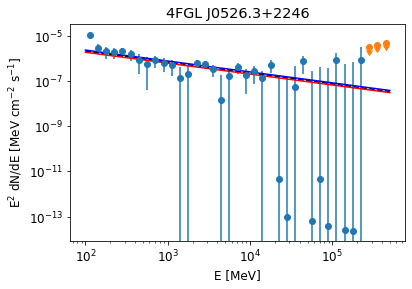

<Figure size 432x288 with 0 Axes>

In [84]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'b')
plt.loglog(E, (E**2)*dnde_lo, 'r')
plt.errorbar(sed2246['e_ctr'][:-3],
             sed2246['e2dnde'][:-3], 
             yerr=sed2246['e2dnde_err'][:-3], fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-3:]),
         sed2246['e2dnde_ul95'][-3:], yerr=0.2*sed2246['e2dnde_ul95'][-3:], 
             fmt='o', uplims=True)
plt.title('4FGL J0526.3+2246')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()
#plt.savefig("Crab_5/J0526.3+2246_spectrum.png")

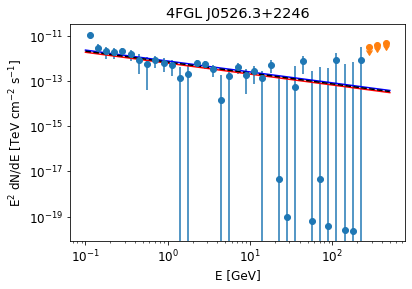

<Figure size 432x288 with 0 Axes>

In [88]:
plt.loglog(E*1e-3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E*1e-3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E*1e-3, (E**2)*dnde*1e-6, 'k--')
plt.errorbar(sed2246['e_ctr'][:-3]*1e-3,
             sed2246['e2dnde'][:-3]*1e-6, 
             yerr=sed2246['e2dnde_err'][:-3]*1e-6, fmt ='o')
plt.errorbar(np.array(sed2246['e_ctr'][-3:]*1e-3),sed2246['e2dnde_ul95'][-3:]*1e-6, yerr=0.2*sed2246['e2dnde_ul95'][-3:]*1e-6, 
             fmt='o', uplims=True)
plt.title('4FGL J0526.3+2246')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0526.3+2246_spectrum+errors.png")

4FGL J0544.4+2238

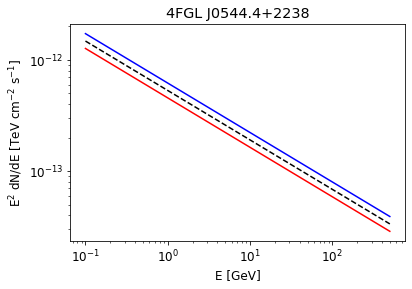

<Figure size 432x288 with 0 Axes>

In [92]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])

plt.title('4FGL J0544.4+2238')
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0544.4+2238_spectrum.png")

In [93]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-02-07 00:37:42 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-02-07 00:37:55 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-07 00:37:55 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-07 00:38:23 INFO    GTAnalysis.sed(): Finished SED
2022-02-07 00:38:31 INFO    GTAnalysis.sed(): Execution time: 48.83 s


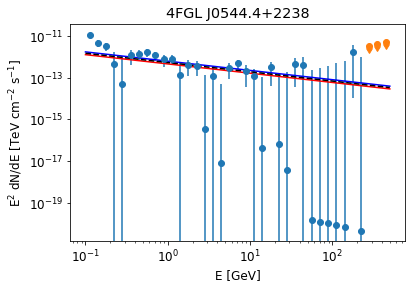

<Figure size 432x288 with 0 Axes>

In [94]:
plt.loglog(E*1e-3, (E**2)*dnde_hi*1e-6, 'b')
plt.loglog(E*1e-3, (E**2)*dnde_lo*1e-6, 'r')
plt.loglog(E*1e-3, (E**2)*dnde*1e-6, 'k--')
plt.errorbar(sed2238['e_ctr'][:-3]*1e-3,
             sed2238['e2dnde'][:-3]*1e-6, 
             yerr=sed2238['e2dnde_err'][:-3]*1e-6, fmt ='o')
plt.errorbar(np.array(sed2238['e_ctr'][-3:]*1e-3),sed2238['e2dnde_ul95'][-3:]*1e-6, yerr=0.2*sed2238['e2dnde_ul95'][-3:]*1e-6, 
             fmt='o', uplims=True)
plt.title('4FGL J0544.4+2238')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()
plt.savefig("Crab_5/J0544.4+2238_spectrum+errors.png")

Let's change unit (MeV -> GeV for the x axis and MeV -> TeV for the y axis)

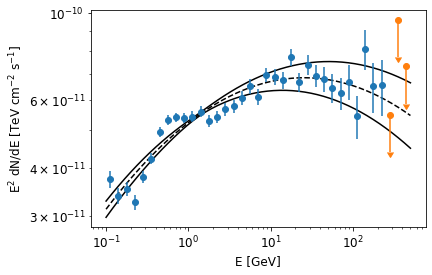

In [66]:
plt.loglog(E*1e-3, (E**2)*dnde*1e-6, 'k--')
plt.loglog(E*1e-3, (E**2)*dnde_hi*1e-6, 'k')
plt.loglog(E*1e-3, (E**2)*dnde_lo*1e-6, 'k')
plt.errorbar(sed['e_ctr'][:-3]*1e-3,
             sed['e2dnde'][:-3]*1e-6, 
             yerr=sed['e2dnde_err'][:-3]*1e-6, fmt ='o')
plt.errorbar(np.array(sed['e_ctr'][-3:]*1e-3),
         sed['e2dnde_ul95'][-3:]*1e-6, yerr=0.2*sed['e2dnde_ul95'][-3:]*1e-6, 
             fmt='o', uplims=True)

plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()